## 1. A Basic Neural Network Model

At its core, the deep learning system is a rather complex mathematical function that maps inputs to outputs.

<img src="https://github.com/ch00226855/temp/blob/e4b3b9404122e50dd367f859b43a6dc984b59cec/.ipynb_checkpoints/Screenshot%20from%202024-02-05%2009-20-01.png?raw=true" width=300>

Deep Learning is supported by a type of machine learning models called **artificial neural network**. An artificial neural network consists of many **artifical neurons**.

A typical artificial neurons is created with the following components:
- **Input channels**: where the neuron gets information
- **Weight parameters**: Each input value will be multiplied by a corresponding weight parameter before being considered by the activation function.
- **Biase parameter**: a constant value added to the weighted sum of inputs.
- **Activation function**: a non-linear function that generates the output of a neuron.

<img src="https://www.simplilearn.com/ice9/free_resources_article_thumb/Perceptron/general-diagram-of-perceptron-for-supervised-learning_4.jpg" height=300>

If we create a network with at least three layers of artifical neurons, this machine learning model is called a **deep neural network**.

<img src="https://qph.cf2.quoracdn.net/main-qimg-a1efd90fe8d2146d2dcaa629385056ff" width=300>

For each layer:
- The weight parameters are organized as a **weight matrix**.
- The biase parameters are organized as a **biase vector**.
- The output values are also organized as a vector.

To implements these computations, the computer often need to work with arrays of dimension 2, 3, or even higher. These arrays are called **tensors**. **PyTorch** is a framework that supports fast tensor computations.

<img src="https://miro.medium.com/v2/resize:fit:500/1*MQIAAntN5tYgKEDNTcpZmg.png" width=300>

## 2. A Deep Learning Playground

Before creating a deep learning model on our own, let's gain some intuition of how it works from the [deep learning playground](https://playground.tensorflow.org/
)

<img src="https://human-centered.ai/wordpress/wp-content/uploads/2016/04/Deep-learning.png" width=200>

## 3. PyTorch for Deep Learning

**PyTorch** is a Python library that facilitaes building deep learning projects.
- PyTorch is easy to use. One can test and manipulate various model components before the entire model is built.
- PyTorch is fast. Most of PyTorch is written in C++ and CUDA. It supports fast tensor computations, which is the most time-consuming part of a deep learning project.
- PyTorch can accelerate computation using graphical processing unites (GPUs). GPUs can do computation 50x faster than CPUs with a similar price.

In [1]:
import torch

In [2]:
torch.__version__

'2.6.0'

In [3]:
torch.cuda.is_available()

False

In [4]:
# Create a tensor directly from data.
data = [[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9.12]]
data_tensor = torch.tensor(data)
print(data_tensor)

tensor([[1.0000, 2.0000, 3.0000],
        [4.0000, 5.0000, 6.0000],
        [7.0000, 8.0000, 9.1200]])


In [5]:
# Attributes of a tensor
print("Shape of tensor:", data_tensor.shape)
print("Datatype of tensor:", data_tensor.dtype)
print("Device the tensor is stored on:", data_tensor.device)

Shape of tensor: torch.Size([3, 3])
Datatype of tensor: torch.float32
Device the tensor is stored on: cpu


In [6]:
# Matrix addition and multiplication
# data_tensor + data_tensor
# data_tensor * data_tensor
data_tensor @ data_tensor

tensor([[ 30.0000,  36.0000,  42.3600],
        [ 66.0000,  81.0000,  96.7200],
        [102.8400, 126.9600, 152.1744]])

## 4. MNIST Image Classification

The MNIST database (Modified National Institute of Standards and Technology database) is a large collection of handwritten digits. It has a training set of 60,000 examples, and a test set of 10,000 examples.

<img src="https://upload.wikimedia.org/wikipedia/commons/f/f7/MnistExamplesModified.png" width=300>

Let's create a deep neural network model that can be used to identify these images.

*Reference*: [PyTorch quickstart](https://pytorch.org/tutorials/beginner/basics/quickstart_tutorial.html)

In [9]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

### Loading Data

In [10]:
# Download training data from open datasets.
training_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

100.0%
100.0%
100.0%
100.0%


In [23]:
torch.set_printoptions(linewidth=200)  # Adjust the linewidth as needed
print("Shape:", training_data.data.shape)
print("Data Type:", training_data.data.dtype)
print("Device:", training_data.data.device)
training_data.data[2] # Zoom out to see the shape of the digit

Shape: torch.Size([60000, 28, 28])
Data Type: torch.uint8
Device: cpu


tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  67, 232,  39,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,  62,  81,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  

In [12]:
print("Total number of values contained in the training data set:", 60000 * 28 * 28)

Total number of values contained in the training data set: 47040000


In [57]:
print("Shape:", training_data.targets.shape)
training_data.targets[0:10]

Shape: torch.Size([60000])


tensor([4, 1, 4, 1, 6, 7, 6, 8, 0, 9])

Label: tensor(4)


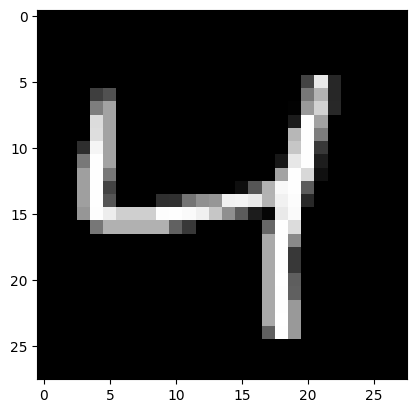

In [24]:
import matplotlib.pyplot as plt
idx = 2
plt.imshow(training_data.data[idx, :, :], cmap='gray') # ":" represents "0:28"
print("Label:", training_data.targets[idx])

In [15]:
batch_size = 64

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64


In [16]:
# Get cpu, gpu or mps device for training.
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using mps device


In [17]:
# Define model
class NeuralNetwork(nn.Module): # Build the new class by extending the Module class
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten() # This is the input layer that can flatten the input 2D array
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512), # This represents the weighted summation of the first hidden layer
            nn.ReLU(),             # This is the activation function for the first hidden layer
            nn.Linear(512, 512),   # Another dense layer
            nn.ReLU(),
            nn.Linear(512, 10)     # The output layer.
        )                          # It has only 10 nodes because we need 10
                                   # probabilities for the prediction.

    def forward(self, x):   # Specifies how the model produces the outcome
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


### Optimizing Model Parameters

To train a model, we need a loss function and an optimizer.
- The **loss function** is to evaluate the current performance of the model on the training data. Smaller losses indicate better performances.
- The **optimizer** suggests parameter modifications so that the model's performance may get improved.

In [19]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

In [20]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()  # Turn on the training mode
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()  # Compute the gradient of the loss
        optimizer.step() # Use the gradient to update the parameters
        optimizer.zero_grad() # Reset the gradient vector

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [25]:
epochs = 15  # The number of data passes
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
print("Done!")

Epoch 1
-------------------------------
loss: 0.514898  [   64/60000]
loss: 0.399059  [ 6464/60000]
loss: 0.458957  [12864/60000]
loss: 0.464469  [19264/60000]
loss: 0.419976  [25664/60000]
loss: 0.451917  [32064/60000]
loss: 0.354057  [38464/60000]
loss: 0.545254  [44864/60000]
loss: 0.506659  [51264/60000]
loss: 0.522371  [57664/60000]
Epoch 2
-------------------------------
loss: 0.491484  [   64/60000]
loss: 0.379931  [ 6464/60000]
loss: 0.435324  [12864/60000]
loss: 0.450012  [19264/60000]
loss: 0.400308  [25664/60000]
loss: 0.438756  [32064/60000]
loss: 0.336324  [38464/60000]
loss: 0.527347  [44864/60000]
loss: 0.487801  [51264/60000]
loss: 0.511787  [57664/60000]
Epoch 3
-------------------------------
loss: 0.471098  [   64/60000]
loss: 0.364136  [ 6464/60000]
loss: 0.414752  [12864/60000]
loss: 0.437766  [19264/60000]
loss: 0.383529  [25664/60000]
loss: 0.427789  [32064/60000]
loss: 0.321309  [38464/60000]
loss: 0.512010  [44864/60000]
loss: 0.471649  [51264/60000]
loss: 0.50

In [ ]:
# Exercise: Select 3 images from the test set and examine the model predictions.

model.eval() # Turn the model to evaluation model

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)

Label: tensor(7)


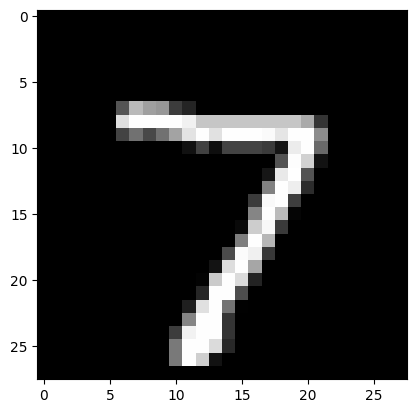

In [35]:
# Select the first image in the test set.
idx = 0
first_img = test_data.data[idx, :, :]
# print(first_img) # Display the values that are in this image
plt.imshow(first_img, cmap='grey')
print('Label:', test_data.targets[idx])

Label: tensor(7)
tensor([[ 0.0798, -4.3783,  0.1537,  2.2051, -2.5689, -0.8615, -7.2846,  9.4675, -0.4718,  3.9187]], device='mps:0', grad_fn=<LinearBackward0>)


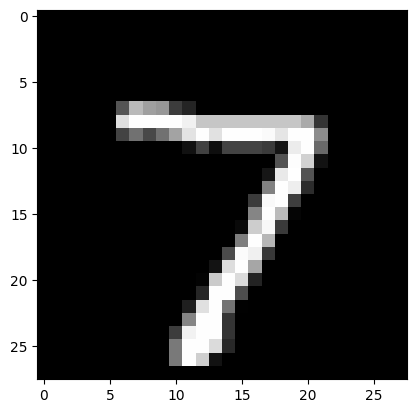

In [45]:
# Ensure the model and inputs are on the same device
device = torch.device("mps") if torch.backends.mps.is_available() else torch.device("cpu")
model.to(device)  # Move model to MPS if available

for X, y in test_dataloader:
    # Move input tensor to the same device as the model
    X = X.to(device)

    # Display the image (must move it to CPU before numpy conversion)
    plt.imshow(X[idx].cpu().detach().numpy().reshape(28, 28), cmap='gray')

    # Make prediction
    pred = model(X[idx:idx+1])
    print('Label:', y[idx])
    print(pred)
    break

Let's check the model's performance against another dataset (the test dataset) to ensure it is learning.

In [ ]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad(): # Keep no gradient turned off during this with block
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [47]:
test(test_dataloader, model, loss_fn)

Test Error: 
 Accuracy: 90.6%, Avg loss: 0.326726 



In [48]:
test(train_dataloader, model, loss_fn)

Test Error: 
 Accuracy: 90.3%, Avg loss: 0.340814 



In [49]:
# Select three random images from the test set
selected_indices = [100, 200, 300]  # Change these indices as needed

# Create a list of images using a for loop
lst = []  # Start with an empty list
for i in selected_indices: # go through all indices
    lst.append(test_data[i][0])
# print(lst)

# Create a list of these images using list comprehension.
selected_images = [test_data[i][0] for i in selected_indices]
selected_labels = [test_data[i][1] for i in selected_indices]

In [50]:
# Since the model is now on GPU, let's sample a few images from the dataloader.
for X, y in test_dataloader:
    X = X.to(device)
    y = y.to(device)

    selected_indices = [1, 3, 5]
    selected_images = X[selected_indices, :, :, :]
    selected_labels = y[selected_indices]
    # print(selected_images)
    # print(selected_labels)
    break

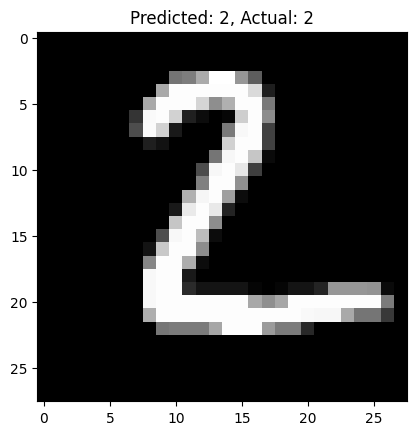

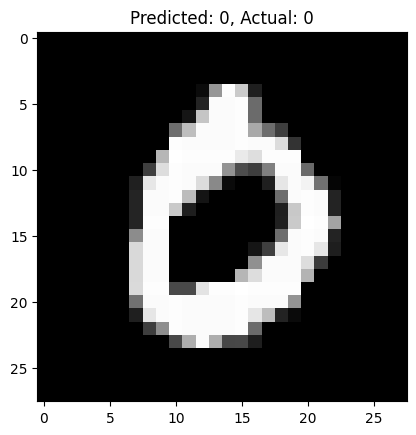

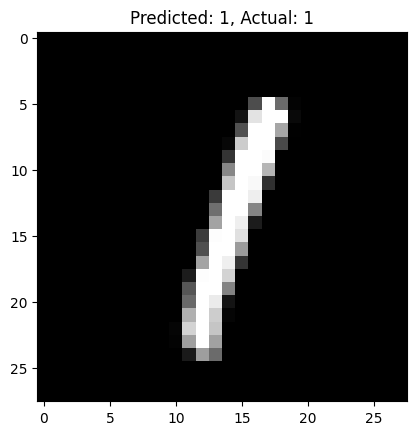

In [51]:
import matplotlib.pyplot as plt
with torch.no_grad():
    for i, image in enumerate(selected_images):
        image = image.unsqueeze(0)  # Add batch dimension
        output = model(image)
        predicted_label = output.argmax(dim=1).item()

        plt.imshow(image.cpu().squeeze().numpy(), cmap='gray')
        plt.title(f"Predicted: {predicted_label}, Actual: {selected_labels[i]}")
        plt.show()

### The `with` block

The expression in the `with` statement will create an object.
- The object's `__enter__` method will be called automatically at the beginning of the block,
- Its `__exit__()` method will be automatically called when the block ends.

In [52]:
class SimpleClass:

    def __init__(self):
        pass

    def __enter__(self):
        print("The __enter__ method is called.")
        return 5

    def __exit__(self, *args):
        print("The __exit__ method is called.")

with SimpleClass() as obj:
    print(obj)

print(obj)

The __enter__ method is called.
5
The __exit__ method is called.
5


## Exercise: Recreate the Neural Network

Based on the code above, let's streamline the program to build and train the neural network, removing any unnecessary code for simplicity.

In [72]:
# Using EMNIST Dataset

# Download training data from open datasets.
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

# Download test data from open datasets.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

In [73]:
training_data.data.shape

torch.Size([60000, 28, 28])

Label: tensor(9)


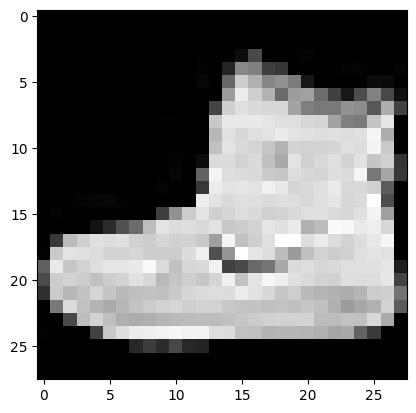

In [77]:
idx = 0
plt.imshow(training_data.data[idx, :, :], cmap='grey')
print("Label:", training_data.targets[idx])

In [78]:
batch_size = 64

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64


In [79]:
# Define model
class NeuralNetwork(nn.Module): # Build the new class by extending the Module class
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten() # This is the input layer that can flatten the input 2D array
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512), # This represents the weighted summation of the first hidden layer
            nn.ReLU(),             # This is the activation function for the first hidden layer
            nn.Linear(512, 512),   # Another dense layer
            nn.ReLU(),
            nn.Linear(512, 10)     # The output layer.
        )                          # It has only 10 nodes because we need 10
                                   # probabilities for the prediction.

    def forward(self, x):   # Specifies how the model produces the outcome
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [80]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

In [81]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()  # Turn on the training mode
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()  # Compute the gradient of the loss
        optimizer.step() # Use the gradient to update the parameters
        optimizer.zero_grad() # Reset the gradient vector

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [84]:
epochs = 15  # The number of data passes
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
print("Done!")

Epoch 1
-------------------------------
loss: 0.642939  [   64/60000]
loss: 0.750655  [ 6464/60000]
loss: 0.516073  [12864/60000]
loss: 0.752673  [19264/60000]
loss: 0.665852  [25664/60000]
loss: 0.646364  [32064/60000]
loss: 0.709686  [38464/60000]
loss: 0.728170  [44864/60000]
loss: 0.729970  [51264/60000]
loss: 0.674809  [57664/60000]
Epoch 2
-------------------------------
loss: 0.622205  [   64/60000]
loss: 0.731578  [ 6464/60000]
loss: 0.499664  [12864/60000]
loss: 0.739952  [19264/60000]
loss: 0.654749  [25664/60000]
loss: 0.634660  [32064/60000]
loss: 0.692342  [38464/60000]
loss: 0.717961  [44864/60000]
loss: 0.718515  [51264/60000]
loss: 0.661685  [57664/60000]
Epoch 3
-------------------------------
loss: 0.603462  [   64/60000]
loss: 0.713901  [ 6464/60000]
loss: 0.484863  [12864/60000]
loss: 0.728130  [19264/60000]
loss: 0.644691  [25664/60000]
loss: 0.624254  [32064/60000]
loss: 0.676087  [38464/60000]
loss: 0.708722  [44864/60000]
loss: 0.708326  [51264/60000]
loss: 0.64

In [86]:
model.eval() # Turn the model to evaluation model
test(test_dataloader, model, loss_fn)
test(train_dataloader, model, loss_fn)

Test Error: 
 Accuracy: 80.8%, Avg loss: 0.550530 

Test Error: 
 Accuracy: 82.0%, Avg loss: 0.527712 



In [87]:
# Select three random images from the test set
selected_indices = [100, 200, 300]  # Change these indices as needed

# Create a list of images using a for loop
lst = []  # Start with an empty list
for i in selected_indices: # go through all indices
    lst.append(test_data[i][0])
# print(lst)

# Create a list of these images using list comprehension.
selected_images = [test_data[i][0] for i in selected_indices]
selected_labels = [test_data[i][1] for i in selected_indices]

In [88]:
# Since the model is now on GPU, let's sample a few images from the dataloader.
for X, y in test_dataloader:
    X = X.to(device)
    y = y.to(device)

    selected_indices = [1, 3, 5]
    selected_images = X[selected_indices, :, :, :]
    selected_labels = y[selected_indices]
    # print(selected_images)
    # print(selected_labels)
    break

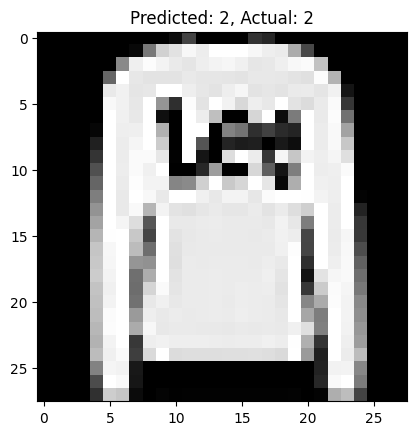

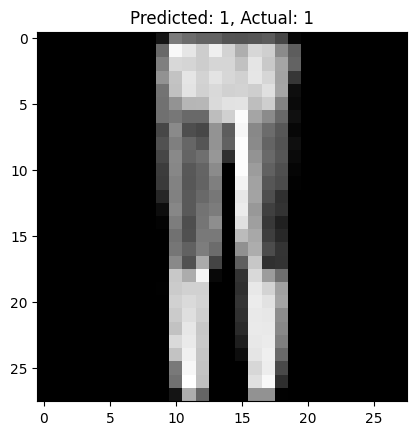

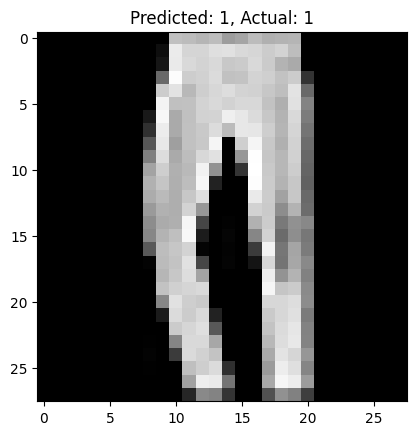

In [89]:
import matplotlib.pyplot as plt
with torch.no_grad():
    for i, image in enumerate(selected_images):
        image = image.unsqueeze(0)  # Add batch dimension
        output = model(image)
        predicted_label = output.argmax(dim=1).item()

        plt.imshow(image.cpu().squeeze().numpy(), cmap='gray')
        plt.title(f"Predicted: {predicted_label}, Actual: {selected_labels[i]}")
        plt.show()